Aqui tenemos una implementacion fallida de Resnet18, con un sobreentreno muy alto
asi como tiempos de entreno increiblemente altos, por lo que se decidio cambiar de modelo a menos complejos.

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the organized dataset
organized_data_dir = './data/pets/formatted_images'
dataset = datasets.ImageFolder(root=organized_data_dir, transform=transform)
dataset_loader = DataLoader(dataset, batch_size=32, shuffle=True)

print(f"Loaded {len(dataset)} images under {len(dataset.classes)} classes.")


Loaded 7390 images under 35 classes.


In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
from torch import nn, optim
import torch.nn.functional as F
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Adjusting for the number of classes in your dataset
model = model.to(device)


In [10]:
#mismos que se utilizaran en el resto, ya que depues de tests preliminares, fue la mas efectiva
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [12]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Assuming your dataset is organized into 'formatted_images' folder
data_dir = './data/pets/formatted_images'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the images: {100 * correct // total}%')


Accuracy of the network on the images: 96%


In [15]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
from torch import nn, optim
import torch.nn.functional as F

# Define transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
data_dir = './data/pets/formatted_images'
dataset = datasets.ImageFolder(root=data_dir, transform=transform)


In [16]:
# Splitting the dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [17]:
# Setting up the model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(dataset.classes))
model = model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [23]:
num_epochs = 20

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Use the device variable
        
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Validation Accuracy after epoch {epoch+1}: {100 * correct / total}%')

print("Finished Training")


Epoch 1, Loss: 0.36795546690354475
Validation Accuracy after epoch 1: 75.30446549391068%
Epoch 2, Loss: 0.10142733806844902
Validation Accuracy after epoch 2: 77.53721244925575%
Epoch 3, Loss: 0.04246055936830974
Validation Accuracy after epoch 3: 78.07848443843031%
Epoch 4, Loss: 0.01895716693346716
Validation Accuracy after epoch 4: 80.17591339648173%
Epoch 5, Loss: 0.027123306758978682
Validation Accuracy after epoch 5: 79.16102841677943%
Epoch 6, Loss: 0.07679744946606759
Validation Accuracy after epoch 6: 73.00405953991881%
Epoch 7, Loss: 0.18031449099448887
Validation Accuracy after epoch 7: 61.90798376184033%
Epoch 8, Loss: 0.13853194502408842
Validation Accuracy after epoch 8: 72.12449255751015%
Epoch 9, Loss: 0.12029627913332268
Validation Accuracy after epoch 9: 74.6278755074425%
Epoch 10, Loss: 0.05108890115736506
Validation Accuracy after epoch 10: 77.26657645466847%
Epoch 11, Loss: 0.030024857440258602
Validation Accuracy after epoch 11: 78.28146143437077%
Epoch 12, Loss: 

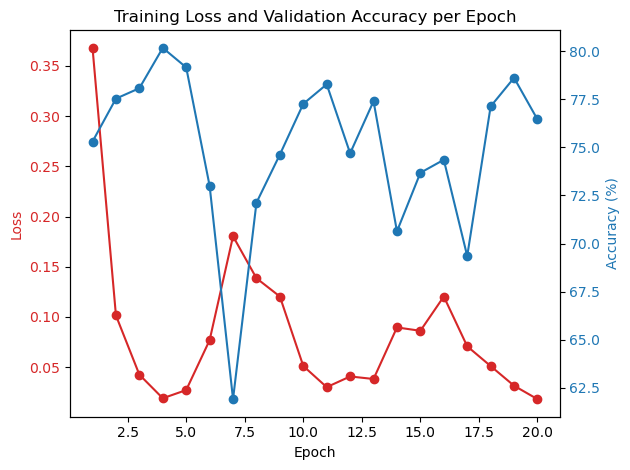

In [1]:
import matplotlib.pyplot as plt

# Epochs
epochs = list(range(1, 21))  # 20 epochs

# datos de entreno
losses = [
    0.36795546690354475, 0.10142733806844902, 0.04246055936830974, 0.01895716693346716,
    0.027123306758978682, 0.07679744946606759, 0.18031449099448887, 0.13853194502408842,
    0.12029627913332268, 0.05108890115736506, 0.030024857440258602, 0.04067388439151408,
    0.03815728510302063, 0.08951737514029987, 0.08616857058557405, 0.12029590295514445,
    0.07070937030130645, 0.05103387278473206, 0.03143738973177843, 0.018066346839721616
]

accuracies = [
    75.30446549391068, 77.53721244925575, 78.07848443843031, 80.17591339648173,
    79.16102841677943, 73.00405953991881, 61.90798376184033, 72.12449255751015,
    74.6278755074425, 77.26657645466847, 78.28146143437077, 74.69553450608932,
    77.40189445196211, 70.63599458728011, 73.68064952638701, 74.35723951285522,
    69.35047361299053, 77.13125845737483, 78.61975642760487, 76.45466847090663
]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, losses, color=color, marker='o', label='Training Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(epochs, accuracies, color=color, marker='o', label='Validation Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Training Loss and Validation Accuracy per Epoch')
fig.tight_layout()
plt.show()

Un entreno bastante decepcionante desde la preciosion a el loss, esto sin tener en cuenta aun el gran sobre-entreno que se llega

In [24]:
correct = 0
total = 0
for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'training Accuracy after epoch {epoch+1}: {100 * correct / total}%')

Validation Accuracy after epoch 20: 99.15426251691476%


El de arriba deberia decir training y abajo es de validation

In [25]:
correct = 0
total = 0
for images, labels in val_loader:
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Validation Accuracy after epoch {epoch+1}: {100 * correct / total}%')

Validation Accuracy after epoch 20: 76.45466847090663%


Aqui se puede ver el mayor fallo del modelo, su pesimo rendimiento de validacion, mientras mantiene un training accuracy de 99%
llega a 76% de accuracy en el test dataset, con losses tan bajos que le seria casi imposible reducirlo.